In [53]:
import numpy as np
import pandas as pd
from collections import defaultdict 
import itertools
import networkx as nx 
import matplotlib.pyplot as plt

In [28]:
P_list = ["dummy", 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94]
# df = pd.DataFrame(data = np.array([[0, 1, 1, 0, 0, 0, 0, 0],
#                                    [0, 0, 0, 1, 1, 0, 0, 0],
#                                    [0, 0, 0, 1, 0, 1, 0, 1],
#                                    [0, 0, 0, 0, 1, 1, 0, 1],
#                                    [0, 0, 0, 0, 0, 1, 1, 0],
#                                    [0, 0, 0, 0, 0, 0, 1, 1],
#                                    [0, 0, 0, 0, 0, 0, 0, 0],
#                                    [0, 0, 0, 0, 0, 0, 0, 0]
#                                   ]))
# Start , 1,2,3,4,5,6,7,8, End
df = pd.DataFrame(data = np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
                                   [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                                   [0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
                                   [0, 0, 0, 0, 0, 1, 1, 0, 1, 0],
                                   [0, 0, 0, 0, 0, 0, 1, 1, 0, 0],
                                   [0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
                                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
                                  ]))

In [63]:
class Graph: 
   
    def __init__(self, vertices): 
        # No. of vertices 
        self.V = vertices  
          
        # default dictionary to store graph 
        self.graph = defaultdict(list)
        self.paths = []
        self.nodes_edges = []
   
    # function to add an edge to graph 
    
    def addEdge(self, u, v): 
        self.graph[u].append(v) 
        self.nodes_edges.append([u, v])
   
    '''A recursive function to print all paths from 'u' to 'd'. 
    visited[] keeps track of vertices in current path. 
    path[] stores actual vertices and path_index is current 
    index in path[]'''
    def printAllPathsUtil(self, u, d, visited, path): 
        # Mark the current node as visited and store in path 
        visited[u]= True
        path.append(u) 
  
        # If current vertex is same as destination, then print 
        # current path[] 
        if u == d: 
            print(f"[INFO] {path}")
            self.paths.append(path.copy())
        else: 
            # If current vertex is not destination 
            # Recur for all the vertices adjacent to this vertex 
            for i in self.graph[u]: 
                if visited[i]== False: 
                    self.printAllPathsUtil(i, d, visited, path) 
                      
        # Remove current vertex from path[] and mark it as unvisited 
        path.pop()
        visited[u]= False
   
   
    # Prints all paths from 's' to 'd' 
    def printAllPaths(self, s, d): 
  
        # Mark all the vertices as not visited 
        visited =[False]*(self.V) 
  
        # Create an array to store paths 
        path = [] 
  
        # Call the recursive helper function to print all paths 
        self.printAllPathsUtil(s, d, visited, path) 

In [72]:
def get_tenacious_schemes(paths, df):
    possible_schemes = []
    max_nodes = 0
    for path in paths:
        possible_schemes.append(path[1:-1])
        if max(path[1:-1]) > max_nodes:
            max_nodes = max(path[1:-1])
        
    all_nodes = list(range(1, max_nodes + 1))
    possible_schemes.append(all_nodes)
    
    for path in possible_schemes:
        xor_nodes = set(path).symmetric_difference(all_nodes)
        for i in range(1, len(xor_nodes)):
            combinations_xor_nodes = list(itertools.combinations(xor_nodes, i))
            for xor_node in combinations_xor_nodes:
                new_path = path.copy()
                new_path.extend(xor_node)
                new_path.sort()
                if new_path not in possible_schemes:
                    possible_schemes.append(new_path)
    return possible_schemes

def get_probabilities(shemes, probs):
    all_nodes = shemes[0].copy()
    P_states = []
    flag = False
    for path in shemes:
        if path == [1,2,3,4,5,7]:
            flag = True
        else:
            flag = False
        p_value = 1
        leftovers = all_nodes.copy()
        for node in path:
            p_value *= round(probs[node], 2)
            leftovers.remove(node)
            if flag:
                pass
        for broken_node in leftovers:
#             print(f'[INFO] broken node: {broken_node}')
            p_value *= round(1 - probs[broken_node], 2)
            if flag:
                pass
            #leftovers.remove(broken_node)
#         print('---')
        P_states.append(round(p_value, 6))
    return P_states

def get_lambda(probs, t):
    return - (np.log(sum(probs))/t)

def draw_graph(g):
    g.nodes_edges
    G = nx.Graph()
    G.add_edges_from(g.nodes_edges)
    nx.draw_networkx(G)
    plt.show()

def calculate_Lab2(df, P_list):
    g = Graph(df.shape[0])
    print(f"[NOTE] Node 0 and N+1 are the start and the end of the graph.")
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            if df.iloc[i, j] == 1:
                if i == 0:
                    #g.addEdge("START", j)
                    g.addEdge(i, j)
                elif j == df.shape[0] - 1:
                    #g.addEdge(i, "END")
                    g.addEdge(i, j)
                else:
                    g.addEdge(i, j)
                print(f"[INFO] Added edge {i} -> {j}.")
    draw_graph(g)
    s = 0
    d = df.shape[0] - 1
    print("----------------------------------------------------------")
    print (f"[INFO] Following are all different paths from node {s} to {d} :") 
    g.printAllPaths(s, d)
    print("----------------------------------------------------------")
    
    schemes = get_tenacious_schemes(g.paths, df)
    schemes.sort(key=len)
    schemes = schemes[::-1]
    probs = get_probabilities(schemes, P_list)
    # probs.sort()
    # P_list = ["dummy", 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.92, 0.94]
    for i, j in zip(shemes, probs):
        print(f"[INFO] {i} = {j}")
    print("----------------------------------------------------------")
        
    P = round(sum(probs), 7)
    print(f"[INFO] P = {P}")
    
    lambda_value = round(get_lambda(probs, 10), 7)
    T = round(1/lambda_value, 7)
    print(f"[INFO] Lambda = {lambda_value}")
    print(f"[INFO] T = {T}")
    return g

[NOTE] Node 0 and N+1 are the start and the end of the graph.
[INFO] Added edge 0 -> 1.
[INFO] Added edge 1 -> 2.
[INFO] Added edge 1 -> 3.
[INFO] Added edge 2 -> 4.
[INFO] Added edge 2 -> 5.
[INFO] Added edge 3 -> 4.
[INFO] Added edge 3 -> 6.
[INFO] Added edge 3 -> 8.
[INFO] Added edge 4 -> 5.
[INFO] Added edge 4 -> 6.
[INFO] Added edge 4 -> 8.
[INFO] Added edge 5 -> 6.
[INFO] Added edge 5 -> 7.
[INFO] Added edge 6 -> 7.
[INFO] Added edge 6 -> 8.
[INFO] Added edge 7 -> 9.
[INFO] Added edge 8 -> 9.


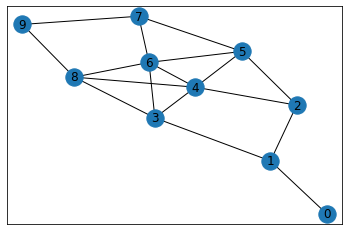

----------------------------------------------------------
[INFO] Following are all different paths from node 0 to 9 :
[INFO] [0, 1, 2, 4, 5, 6, 7, 9]
[INFO] [0, 1, 2, 4, 5, 6, 8, 9]
[INFO] [0, 1, 2, 4, 5, 7, 9]
[INFO] [0, 1, 2, 4, 6, 7, 9]
[INFO] [0, 1, 2, 4, 6, 8, 9]
[INFO] [0, 1, 2, 4, 8, 9]
[INFO] [0, 1, 2, 5, 6, 7, 9]
[INFO] [0, 1, 2, 5, 6, 8, 9]
[INFO] [0, 1, 2, 5, 7, 9]
[INFO] [0, 1, 3, 4, 5, 6, 7, 9]
[INFO] [0, 1, 3, 4, 5, 6, 8, 9]
[INFO] [0, 1, 3, 4, 5, 7, 9]
[INFO] [0, 1, 3, 4, 6, 7, 9]
[INFO] [0, 1, 3, 4, 6, 8, 9]
[INFO] [0, 1, 3, 4, 8, 9]
[INFO] [0, 1, 3, 6, 7, 9]
[INFO] [0, 1, 3, 6, 8, 9]
[INFO] [0, 1, 3, 8, 9]
----------------------------------------------------------
[INFO] [1, 2, 3, 4, 5, 6, 7, 8] = 0.111144
[INFO] [1, 3, 4, 5, 6, 7, 8] = 0.074096
[INFO] [1, 2, 3, 5, 6, 7, 8] = 0.027786
[INFO] [1, 2, 3, 4, 6, 7, 8] = 0.019614
[INFO] [1, 2, 3, 4, 5, 7, 8] = 0.012349
[INFO] [1, 2, 3, 4, 5, 6, 8] = 0.009665
[INFO] [1, 2, 4, 5, 6, 7, 8] = 0.047633
[INFO] [1, 2, 3, 4, 5, 6, 

In [73]:
g = calculate_Lab2(df, P_list)